In [10]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [11]:
#loading data
iris=datasets.load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


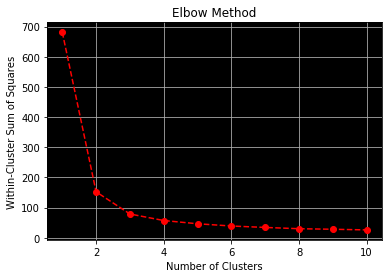

In [3]:
#Finding optimal number of clusters using elbow method
x=iris_df.iloc[:,0:4].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,'--ro')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.grid()
axis=plt.gca()
axis.set_facecolor('k')
plt.show()

In [4]:
#creating k-means classifier
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
ymeans=kmeans.fit_predict(x)
ymeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [5]:
#Coordinates of Cluster Centers
centers=kmeans.cluster_centers_
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

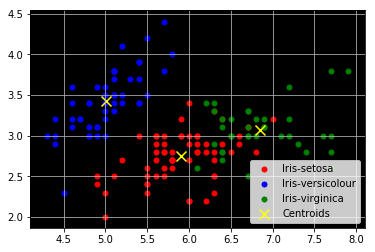

In [6]:
#visualizing data
plt.scatter(x[ymeans==0,0],x[ymeans==0,1],s=100,c='r',label='Iris-setosa',marker='.')
plt.scatter(x[ymeans==1,0],x[ymeans==1,1],s=100,c='b',label='Iris-versicolour',marker='.')
plt.scatter(x[ymeans==2,0],x[ymeans==2,1],s=100,c='g',label='Iris-virginica',marker='.')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids',marker='x')
plt.grid()
axis=plt.gca()
axis.set_facecolor('k')
plt.legend()

In [7]:
from sklearn.metrics import silhouette_score
s=silhouette_score(x,ymeans)
s

0.5528190123564091